In [1]:
import matplotlib.pyplot as plt
import numpy as np
# load neutral density wrapper
import gamman as gn
import xarray as xr
%matplotlib inline

In [2]:
# func to adjust axes font size
def setaxesfsize(axl,fontsize):
    ticklabelbot = axl.get_xticklabels()
    ticklabelleft = axl.get_yticklabels()
    for labelx in ticklabelbot:
        labelx.set_fontsize(fontsize)
    for labely in ticklabelleft:
            labely.set_fontsize(fontsize)

            

# Neutral Density Plots

## Load WOCE global hydographic climatology paramaters (WGHC) dataset

In [4]:
#wghcf = xr.open_dataset("wghc_params.nc", engine='netcdf4')
#wmask = xr.open_dataset("woce_basin_mask.nc", engine='netcdf4')

# get data off the web
url = 'http://icdc.cen.uni-hamburg.de/thredds/dodsC/ftpthredds/woce/wghc_params.nc'
wghcf = xr.open_dataset(url)

In [5]:
wdepth = wghcf['ZAX']
wlon = wghcf['LON']
wlat = wghcf['LAT']
wpres = wghcf['PRES']
wtemp = wghcf['TEMP']
wpottemp = wghcf['TPOTEN']
wsalt = wghcf['SALINITY']
wsig0 = wghcf['SIG0']
wsig2 = wghcf['SIG2']
wsig4 = wghcf['SIG4']
wgamman = wghcf['GAMMAN']
wo2 = wghcf['OXYGEN']
wso2 = wghcf['SILICATE']
wno2 = wghcf['NITRATE']
wpo4 = wghcf['PHOSPH']


In [6]:
zwtemp=wtemp.mean(dim='LON')
zwpottemp=wpottemp.mean(dim='LON')
zwsalt=wsalt.mean(dim='LON')
zwsig0=wsig0.mean(dim='LON')
zwgamman=wgamman.mean(dim='LON')
zwpres=wpres.mean(dim='LON')

zwo2=wo2.mean(dim='LON')
zwso2=wso2.mean(dim='LON')
zwno2=wno2.mean(dim='LON')
zwpo4=wpo4.mean(dim='LON')



In [7]:
#Test pygamman package on one depth profile (zonally averaged near equator)
ctdt=zwtemp[:,170]
ctds=zwsalt[:,170]
ctdp=zwpres[:,170]
n=ctdp.shape[0]
alon=0
alat=0

In [8]:
# test pygamman
gamma_n, dgl, dgh = gn.gamma_n(ctds,ctdt,ctdp,n,alon,alat)

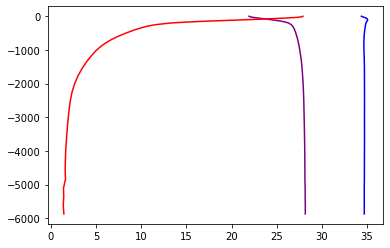

In [9]:
plt.plot(gamma_n,-zwpres[:,170],color='purple')
plt.plot(ctdt,-zwpres[:,170], color='red')
plt.plot(ctds,-zwpres[:,170], color='blue')

In [10]:
narray=np.tile(44,(wsalt.shape[1],wsalt.shape[2]))
print (narray.shape)

(341, 720)


In [11]:
# Now calculate gamma_n using my pygamma package from WOCE 3-D data
# passing nan's to fortran crashes the kernel. Fill the nan's with -99 before calling pygamman
try3d,el,eh=gn.gamma_n(wsalt[:,170,100].fillna(-99.0),wtemp[:,170,100].fillna(-99.0),wpres[:,170,100].fillna(-99.0),narray[170,100],wlon[100],wlat[170])

In [12]:
print (try3d)
print (el)
print (eh)

[ 23.262981  23.286095  23.286207  23.291132  23.352386  23.458607
  23.836323  24.363514  24.993399  25.561779  25.989388  26.319134
  26.590069  26.775106  26.88302   26.969917  27.100164  27.205473
  27.295887  27.392534  27.464449  27.535948  27.59517   27.647203
  27.699867  27.745293  27.794794  27.890217  27.963818  28.010181
  28.040142  28.058947  28.073685  28.0901    28.104912  28.118647
 -99.1      -99.1      -99.1      -99.1      -99.1      -99.1
 -99.1      -99.1     ]
[ 5.0000002e-04  5.0000002e-04  5.0000002e-04  5.0000002e-04
  5.0000002e-04  5.0000002e-04  5.0000002e-04  5.0000002e-04
  5.0000002e-04  5.0000002e-04  5.0000002e-04  5.0000002e-04
  5.0000002e-04  5.0000002e-04  5.0000002e-04  5.0000002e-04
  5.0000002e-04  5.0000002e-04  9.3748636e-04  1.5369487e-03
  3.6355136e-03  7.4021332e-03  1.2448524e-02  1.8038152e-02
  2.4693253e-02  3.1719536e-02  4.0291581e-02  6.2578999e-02
  8.5062519e-02  1.0624841e-01  1.2593180e-01  1.4433908e-01
  1.6234711e-01  1.80378

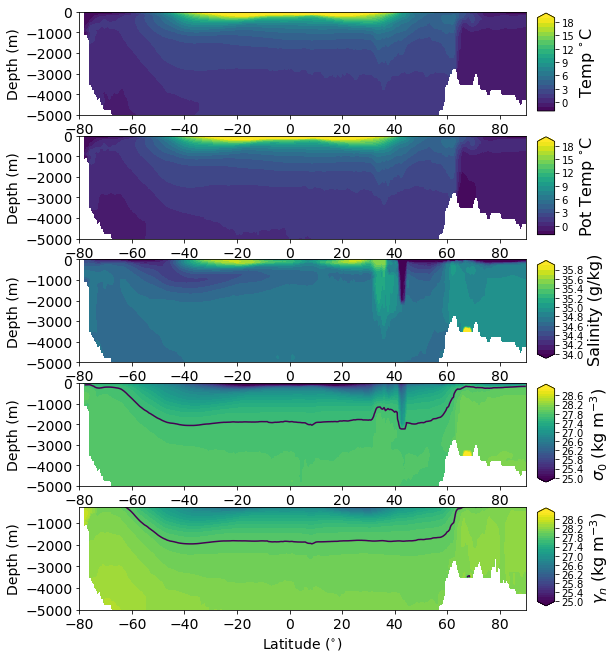

In [13]:
fig = plt.figure(figsize=(8,11.0))


pdlevs0=np.arange(0,2000,50.0)
pdlevs1=np.arange(0,2000,50.0)
pdlevs2=np.arange(0,2000,50.0)
pdlevs3=np.arange(39.0,43.,0.1)
pdlevs4=np.arange(43.5,47.5,0.1)

levs0=np.arange(-2,20,1.0)
levs1=np.arange(-2,20,1.0)
levs2=np.arange(34.0,36.,0.1)
levs3=np.arange(25.0,29.,0.1)
levs4=np.arange(25.0,29.,0.1)


# modern thickness diffusivity
ax0=plt.subplot(511)

cp0=ax0.contourf(wlat,-1*wdepth,zwtemp,levs0,extend='max')
# 27.9 sigma0
#cp0a=ax0.contour(clat,-0.01*cdepth,csig0,[27.9],colors='white')

ax0.set_ylim(-5000,0)
ax0.set_ylabel("Depth (m)",size=14)
ax0.set_xlabel("Latitude ($^{\circ}$)",size=14)

#ax1.axes.get_xaxis().set_visible(False) # Turn of bottom axis
setaxesfsize(ax0,14)
pos = ax0.get_position()
l, b, w, h = pos.bounds
#print l,b,w,h
cbarxoffset=0.02
cbaryoffset=0.005
ctax0 = fig.add_axes([l+w+cbarxoffset, b+cbaryoffset, 0.03, h*0.95]) # setup colorbar axes
c0b=fig.colorbar(cp0, cax=ctax0, orientation='vertical') # draw colorbar
c0barstrc="Temp $^{\circ}$C"
c0b.set_label(c0barstrc,fontsize=16,y=0.5)

# sigma1
ax1=plt.subplot(512)

cp1=ax1.contourf(wlat,-1*wdepth,zwpottemp,levs1,extend='max')
#cp1a=ax1.contour(slat,-1.0*sdepth,sden.T-1000.0,[27.0],colors='white')
ax1.set_ylim(-5000,0)
ax1.set_ylabel("Depth (m)",size=14)
ax1.set_xlabel("Latitude ($^{\circ}$)",size=14)
#ax1.axes.get_xaxis().set_visible(False) # Turn of bottom axis
setaxesfsize(ax1,14)
pos = ax1.get_position()
l, b, w, h = pos.bounds
#print l,b,w,h
cbarxoffset=0.02
cbaryoffset=0.005
ctax1 = fig.add_axes([l+w+cbarxoffset, b+cbaryoffset, 0.03, h*0.95]) # setup colorbar axes
c1b=fig.colorbar(cp1, cax=ctax1, orientation='vertical') # draw colorbar
c1barstrc="Pot Temp $^{\circ}$C"
c1b.set_label(c1barstrc,fontsize=16,y=0.5)

# sigma2
ax2=plt.subplot(513)
pdlevs=np.arange(33,37,0.1)
npdlevs=pdlevs.shape[0]

cp2=ax2.contourf(wlat,-1*wdepth,zwsalt,levs2,extend='both')
ax2.set_ylim(-5000,0)
ax2.set_ylabel("Depth (m)",size=14)
ax2.set_xlabel("Latitude ($^{\circ}$)",size=14)

#ax1.axes.get_xaxis().set_visible(False) # Turn of bottom axis
setaxesfsize(ax2,14)
pos = ax2.get_position()
l, b, w, h = pos.bounds
#print l,b,w,h
cbarxoffset=0.02
cbaryoffset=0.005
ctax2 = fig.add_axes([l+w+cbarxoffset, b+cbaryoffset, 0.03, h*0.95]) # setup colorbar axes
c2b=fig.colorbar(cp2, cax=ctax2, orientation='vertical') # draw colorbar
c2barstrc="Salinity (g/kg)"
c2b.set_label(c2barstrc,fontsize=16,y=0.5)

# sigma3
ax3=plt.subplot(514)

cp3=ax3.contourf(wlat,-1*wdepth,zwsig0,levs3,extend='both')
cp3a=ax3.contour(wlat,-1*wdepth,zwsig0,[27.7])
ax3.set_ylim(-5000,0)
ax3.set_ylabel("Depth (m)",size=14)
ax3.set_xlabel("Latitude ($^{\circ}$)",size=14)

#ax1.axes.get_xaxis().set_visible(False) # Turn of bottom axis
setaxesfsize(ax3,14)
pos = ax3.get_position()
l, b, w, h = pos.bounds
#print l,b,w,h
cbarxoffset=0.02
cbaryoffset=0.005
ctax3 = fig.add_axes([l+w+cbarxoffset, b+cbaryoffset, 0.03, h*0.95]) # setup colorbar axes
c3b=fig.colorbar(cp3, cax=ctax3, orientation='vertical') # draw colorbar
c3barstrc="$\sigma_0$ (kg m$^{-3}$)"
c3b.set_label(c3barstrc,fontsize=16,y=0.5)

# sigma4
ax4=plt.subplot(515)

cp4=ax4.contourf(wlat,-1*wdepth,zwgamman,levs4,extend='both')
cp4a=ax4.contour(wlat,-1*wdepth,zwgamman,[27.9])
ax4.set_ylim(-5000,-250)
ax4.set_ylabel("Depth (m)",size=14)
ax4.set_xlabel("Latitude ($^{\circ}$)",size=14)
#ax4.axhline(y=-4000,xmin=-90,xmax=90)

#ax1.axes.get_xaxis().set_visible(False) # Turn of bottom axis
setaxesfsize(ax4,14)
pos = ax4.get_position()
l, b, w, h = pos.bounds
#print l,b,w,h
cbarxoffset=0.02
cbaryoffset=0.005
ctax4 = fig.add_axes([l+w+cbarxoffset, b+cbaryoffset, 0.03, h*0.95]) # setup colorbar axes
c4b=fig.colorbar(cp4, cax=ctax4, orientation='vertical') # draw colorbar
c4barstrc="$\gamma_n$ (kg m$^{-3}$)"
c4b.set_label(c4barstrc,fontsize=16,y=0.5)


plt.subplots_adjust(hspace=0.2)


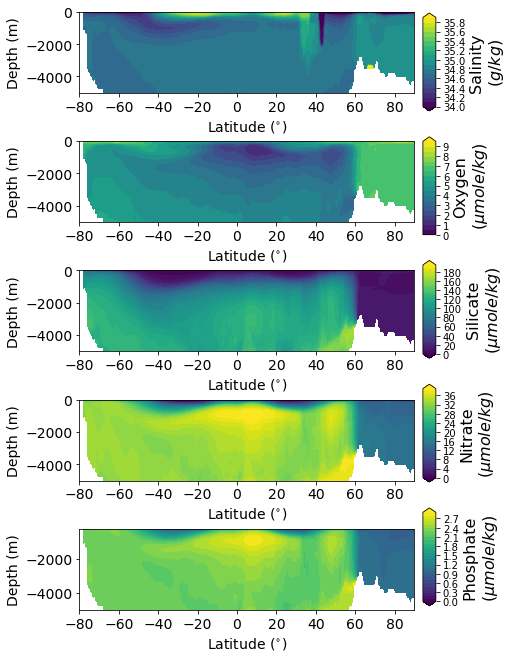

In [14]:
fig = plt.figure(figsize=(6,11.0))



levs0=np.arange(34.0,36.,0.1)
levs1=np.arange(0,10,0.5)
levs2=np.arange(0,200,5.0)
levs3=np.arange(0,40,1.0)
levs4=np.arange(0,3,0.1)


# modern thickness diffusivity
ax0=plt.subplot(511)

cp0=ax0.contourf(wlat,-1*wdepth,zwsalt,levs0,extend='both')
# 27.9 sigma0
#cp0a=ax0.contour(clat,-0.01*cdepth,csig0,[27.9],colors='white')

ax0.set_ylim(-5000,0)
ax0.set_ylabel("Depth (m)",size=14)
ax0.set_xlabel("Latitude ($^{\circ}$)",size=14)

#ax1.axes.get_xaxis().set_visible(False) # Turn of bottom axis
setaxesfsize(ax0,14)
pos = ax0.get_position()
l, b, w, h = pos.bounds
#print l,b,w,h
cbarxoffset=0.02
cbaryoffset=0.005
ctax0 = fig.add_axes([l+w+cbarxoffset, b+cbaryoffset, 0.03, h*0.95]) # setup colorbar axes
c0b=fig.colorbar(cp0, cax=ctax0, orientation='vertical') # draw colorbar
c0barstrc="Salinity\n($g/kg$)"
c0b.set_label(c0barstrc,fontsize=16,y=0.5)

# sigma1
ax1=plt.subplot(512)

cp1=ax1.contourf(wlat,-1*wdepth,zwo2,levs1,extend='max')
#cp1a=ax1.contour(slat,-1.0*sdepth,sden.T-1000.0,[27.0],colors='white')
ax1.set_ylim(-5000,0)
ax1.set_ylabel("Depth (m)",size=14)
ax1.set_xlabel("Latitude ($^{\circ}$)",size=14)
#ax1.axes.get_xaxis().set_visible(False) # Turn of bottom axis
setaxesfsize(ax1,14)
pos = ax1.get_position()
l, b, w, h = pos.bounds
#print l,b,w,h
cbarxoffset=0.02
cbaryoffset=0.005
ctax1 = fig.add_axes([l+w+cbarxoffset, b+cbaryoffset, 0.03, h*0.95]) # setup colorbar axes
c1b=fig.colorbar(cp1, cax=ctax1, orientation='vertical') # draw colorbar
c1barstrc="Oxygen\n($\mu mole/kg$)"
c1b.set_label(c1barstrc,fontsize=16,y=0.5)

# sigma2
ax2=plt.subplot(513)
pdlevs=np.arange(33,37,0.1)
npdlevs=pdlevs.shape[0]

cp2=ax2.contourf(wlat,-1*wdepth,zwso2,levs2,extend='both')
ax2.set_ylim(-5000,0)
ax2.set_ylabel("Depth (m)",size=14)
ax2.set_xlabel("Latitude ($^{\circ}$)",size=14)

#ax1.axes.get_xaxis().set_visible(False) # Turn of bottom axis
setaxesfsize(ax2,14)
pos = ax2.get_position()
l, b, w, h = pos.bounds
#print l,b,w,h
cbarxoffset=0.02
cbaryoffset=0.005
ctax2 = fig.add_axes([l+w+cbarxoffset, b+cbaryoffset, 0.03, h*0.95]) # setup colorbar axes
c2b=fig.colorbar(cp2, cax=ctax2, orientation='vertical') # draw colorbar
c2barstrc="Silicate\n($\mu mole/kg$)"
c2b.set_label(c2barstrc,fontsize=16,y=0.5)

# sigma3
ax3=plt.subplot(514)

cp3=ax3.contourf(wlat,-1*wdepth,zwno2,levs3,extend='both')
ax3.set_ylim(-5000,0)
ax3.set_ylabel("Depth (m)",size=14)
ax3.set_xlabel("Latitude ($^{\circ}$)",size=14)

#ax1.axes.get_xaxis().set_visible(False) # Turn of bottom axis
setaxesfsize(ax3,14)
pos = ax3.get_position()
l, b, w, h = pos.bounds
#print l,b,w,h
cbarxoffset=0.02
cbaryoffset=0.005
ctax3 = fig.add_axes([l+w+cbarxoffset, b+cbaryoffset, 0.03, h*0.95]) # setup colorbar axes
c3b=fig.colorbar(cp3, cax=ctax3, orientation='vertical') # draw colorbar
c3barstrc="Nitrate\n($\mu mole/kg$)"
c3b.set_label(c3barstrc,fontsize=16,y=0.5)

# sigma4
ax4=plt.subplot(515)

cp4=ax4.contourf(wlat,-1*wdepth,zwpo4,levs4,extend='both')
ax4.set_ylim(-5000,-250)
ax4.set_ylabel("Depth (m)",size=14)
ax4.set_xlabel("Latitude ($^{\circ}$)",size=14)
#ax4.axhline(y=-4000,xmin=-90,xmax=90)

#ax1.axes.get_xaxis().set_visible(False) # Turn of bottom axis
setaxesfsize(ax4,14)
pos = ax4.get_position()
l, b, w, h = pos.bounds
#print l,b,w,h
cbarxoffset=0.02
cbaryoffset=0.005
ctax4 = fig.add_axes([l+w+cbarxoffset, b+cbaryoffset, 0.03, h*0.95]) # setup colorbar axes
c4b=fig.colorbar(cp4, cax=ctax4, orientation='vertical') # draw colorbar
c4barstrc="Phosphate\n($\mu mole/kg$)"
c4b.set_label(c4barstrc,fontsize=16,y=0.5)


plt.subplots_adjust(hspace=0.6)


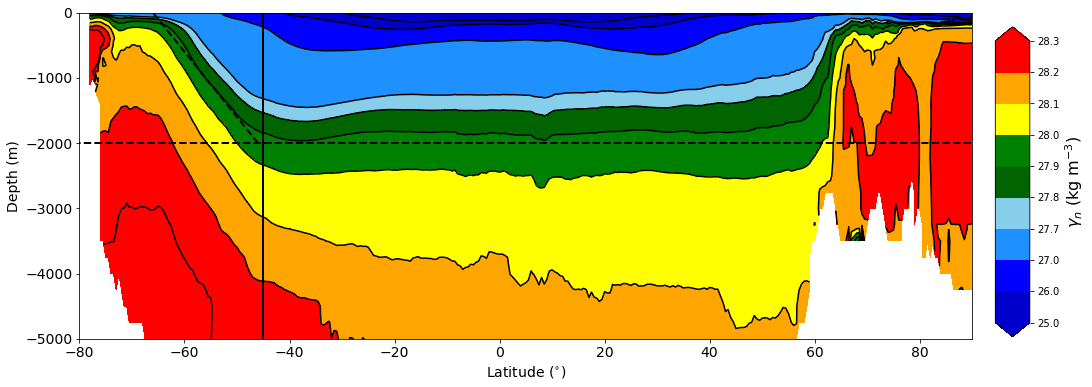

In [15]:
# Reproduce figure 2 of Ferrari et al 2014 (PNAS) (From WOCE data)
fig = plt.figure(figsize=(16,6.0))


ax1=plt.subplot(111)
#pdlevs=np.arange(1025,1029,0.1)
#pdlevs=np.arange(25,29,0.1)
pdlevs=np.array([25.,26.,27.,27.7,27.8,27.9,28.0,28.1,28.2,28.3])
npdlevs=pdlevs.shape[0]

#cp1=ax1.contourf(wlat,-1*wdepth,zwgamman,levs4,extend='both')
cp1=ax1.contourf(wlat,-1.0*wdepth,zwgamman,pdlevs,extend='both',
                 colors = ('mediumblue','blue', 'dodgerblue', 'skyblue','darkgreen','green','yellow','orange', 'red'))
#cp2a=ax1.contour(wlat,-1.0*wdepth,zwgamman,[27.9],color='w')
cp2b=ax1.contour(wlat,-1.0*wdepth,zwgamman,pdlevs,colors='k')
ax1.set_ylim(-5000,0)
ax1.set_ylabel("Depth (m)",size=14)
ax1.set_xlabel("Latitude ($^{\circ}$)",size=14)



#ax1.axes.get_xaxis().set_visible(False) # Turn of bottom axis
setaxesfsize(ax1,14)
pos = ax1.get_position()
l, b, w, h = pos.bounds
#print l,b,w,h
cbarxoffset=0.02
cbaryoffset=0.005
ctax1 = fig.add_axes([l+w+cbarxoffset, b+cbaryoffset, 0.03, h*0.95]) # setup colorbar axes
cb1=fig.colorbar(cp1, cax=ctax1, orientation='vertical') # draw colorbar
cb1arstrc="$\gamma_n$ (kg m$^{-3}$)"
cb1.set_label(cb1arstrc,fontsize=16,y=0.5)

plt.subplots_adjust(hspace=0.0)

#ax1.plot([-48,-65],[-2.,0],lw=3,color='w')
## print out the slope
#print 2500.0/((69-48)*111*1000.)
#print 2000.0/((65-48)*111*1000.)
## add approximate slope of line on SO sloped isopycnal
ax1.plot([-46,-66],[-2000,0],lw=2,color='k',linestyle='--')
ax1.axhline(y=-2000.,xmin=-45.,xmax=90.,lw=2,linestyle='--',color='k')
ax1.axvline(x=-45.,ymin=5000.,ymax=0.,linestyle='-',color='k',lw=2)
#print 2000.0/((66-46)*111*1000.)



In [16]:
# function to do pygamman vertical profiles over latitude and longitude 
# could probably replace this with xarray's apply_ufunc
def gamman3d(arrsalt,arrtemp,arrpres,arrlon,arrlat,lonp=0,latp=0):
    #get dim sizes
    # lonp and latp are offsets to start at
    zlen=arrsalt.values.shape[0]
    ylen=arrsalt.values.shape[1]
    xlen=arrsalt.values.shape[2]
    # create blank masked array to hold gamma_n
    g3d=np.ma.zeros((zlen,ylen,xlen),dtype=float)
    el3d=np.ma.zeros((zlen,ylen,xlen),dtype=float)
    eh3d=np.ma.zeros((zlen,ylen,xlen),dtype=float)
    # set all the grid to missing value
    g3d.fill(-99.1)
    el3d.fill(-99.1)
    eh3d.fill(-99.1)
    # loop over depth profiles at each lat and lon to create a gamma_n profile and fill 3-D array
    # latitudes are restricted to >= 80S and <= 64N
    # need to pass fortran -99 for nan's
    for i in range(0,ylen):
        ix=i+latp
        if arrlat[ix] >=-80.0 and arrlat[ix] <=64.0:
            for j in range(0,xlen):
                jx=j+lonp
                g3d[:,i,j],el3d[:,i,j],eh3d[:,i,j]= gn.gamma_n(arrsalt[:,i,j].fillna(-99.0),arrtemp[:,i,j].fillna(-99.0), \
                                                               arrpres[:,i,j].fillna(-99.0),zlen,arrlon[jx],arrlat[ix])
    # Mask out missing values and return
    g3dmask=np.ma.masked_where(g3d <= -99.0, g3d)
    el3dmask=np.ma.masked_where(el3d <= -99.0, el3d)
    eh3dmask=np.ma.masked_where(eh3d <= -99.0, eh3d)
    return g3dmask,el3dmask,eh3dmask

In [17]:
# test new gamman3d
g3darr,el3darr,eh3darr = \
    gamman3d(wsalt[:,170:171,100:101],wtemp[:,170:171,100:101],\
             wpres[:,170:171,100:101],wlon,wlat,100,170)

In [18]:
g3darr.shape

(44, 1, 1)

In [19]:
print (g3darr[:,0,0])

[23.262981414794922 23.286094665527344 23.28620719909668 23.2911319732666
 23.352386474609375 23.458606719970703 23.836322784423828
 24.363513946533203 24.993398666381836 25.561779022216797
 25.98938751220703 26.319133758544922 26.590068817138672 26.77510643005371
 26.883020401000977 26.96991729736328 27.10016441345215 27.205472946166992
 27.295886993408203 27.392534255981445 27.464448928833008
 27.535947799682617 27.595169067382812 27.64720344543457
 27.699867248535156 27.74529266357422 27.7947940826416 27.890216827392578
 27.963817596435547 28.010181427001953 28.040142059326172
 28.05894660949707 28.073684692382812 28.090099334716797 28.10491180419922
 28.1186466217041 -- -- -- -- -- -- -- --]


In [20]:
print (eh3darr[:,0,0])

[0.0005000000237487257 0.0005000000237487257 0.0005000000237487257
 0.0005000000237487257 0.0005000000237487257 0.0005000000237487257
 0.0005000000237487257 0.0005000000237487257 0.0005000000237487257
 0.0005000000237487257 0.0005000000237487257 0.0005000000237487257
 0.0005000000237487257 0.0005000000237487257 0.0005000000237487257
 0.0005000000237487257 0.0005000000237487257 0.0005000000237487257
 0.0009374863584525883 0.0012155596632510424 0.000551775039639324
 0.0005000000237487257 0.0005000000237487257 0.0005000000237487257
 0.0005000000237487257 0.0005000000237487257 0.0005000000237487257
 0.0005000000237487257 0.0005000000237487257 0.0005000000237487257
 0.0005000000237487257 0.0005000000237487257 0.0005000000237487257
 0.0005000000237487257 0.0005000000237487257 0.0005000000237487257 -- --
 -- -- -- -- -- --]


In [21]:
%%time

# test new gamman3d
g3darr,el3darr,eh3darr = \
    gamman3d(wsalt[:,170:171,100:101],wtemp[:,170:171,100:101],\
             wpres[:,170:171,100:101],wlon,wlat,100,170)

CPU times: user 2.77 ms, sys: 842 µs, total: 3.62 ms
Wall time: 3.34 ms


In [22]:
%%time
# 6.5 min is slow, this could be sped up with xarray possibly.
# test new gamman3d
g3darr,el3darr,eh3darr = gamman3d(wsalt,wtemp,wpres,wlon,wlat)

CPU times: user 6min 44s, sys: 585 ms, total: 6min 44s
Wall time: 6min 44s


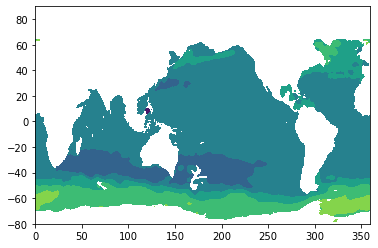

In [23]:
plt.contourf(wlon,wlat,g3darr[20,:,:])

In [24]:
# zonal average woce variable
def wzonavg(wocevar):
    zvar=np.ma.average(wocevar,axis=2)
    return zvar


In [25]:
zg3darr = wzonavg(g3darr)

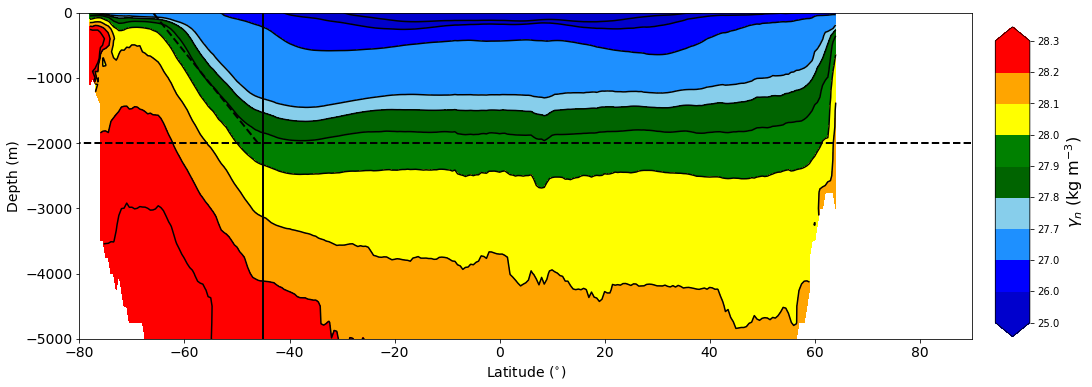

In [26]:
# Reproduce figure 2 of Ferrari et al 2014 (PNAS)
fig = plt.figure(figsize=(16,6.0))


ax1=plt.subplot(111)
#pdlevs=np.arange(1025,1029,0.1)
#pdlevs=np.arange(25,29,0.1)
pdlevs=np.array([25.,26.,27.,27.7,27.8,27.9,28.0,28.1,28.2,28.3])
npdlevs=pdlevs.shape[0]

#cp1=ax1.contourf(wlat,-1*wdepth,zwgamman,levs4,extend='both')
cp1=ax1.contourf(wlat,-1.0*wdepth,zg3darr,pdlevs,extend='both',
                 colors = ('mediumblue','blue', 'dodgerblue', 'skyblue','darkgreen','green','yellow','orange', 'red'))
#cp2a=ax1.contour(wlat,-1.0*wdepth,zwgamman,[27.9],color='w')
cp2b=ax1.contour(wlat,-1.0*wdepth,zg3darr,pdlevs,colors='k')
ax1.set_ylim(-5000,0)
ax1.set_ylabel("Depth (m)",size=14)
ax1.set_xlabel("Latitude ($^{\circ}$)",size=14)



#ax1.axes.get_xaxis().set_visible(False) # Turn of bottom axis
setaxesfsize(ax1,14)
pos = ax1.get_position()
l, b, w, h = pos.bounds
#print l,b,w,h
cbarxoffset=0.02
cbaryoffset=0.005
ctax1 = fig.add_axes([l+w+cbarxoffset, b+cbaryoffset, 0.03, h*0.95]) # setup colorbar axes
cb1=fig.colorbar(cp1, cax=ctax1, orientation='vertical') # draw colorbar
cb1arstrc="$\gamma_n$ (kg m$^{-3}$)"
cb1.set_label(cb1arstrc,fontsize=16,y=0.5)

plt.subplots_adjust(hspace=0.0)

#ax1.plot([-48,-65],[-2.,0],lw=3,color='w')
## print out the slope
#print 2500.0/((69-48)*111*1000.)
#print 2000.0/((65-48)*111*1000.)
## add approximate slope of line on SO sloped isopycnal
ax1.plot([-46,-66],[-2000,0],lw=2,color='k',linestyle='--')
ax1.axhline(y=-2000.,xmin=-45.,xmax=90.,lw=2,linestyle='--',color='k')
ax1.axvline(x=-45.,ymin=5000.,ymax=0.,linestyle='-',color='k',lw=2)
#print 2000.0/((66-46)*111*1000.)



In [27]:
#difference the two to see changes
zgndiff=zwgamman-zg3darr


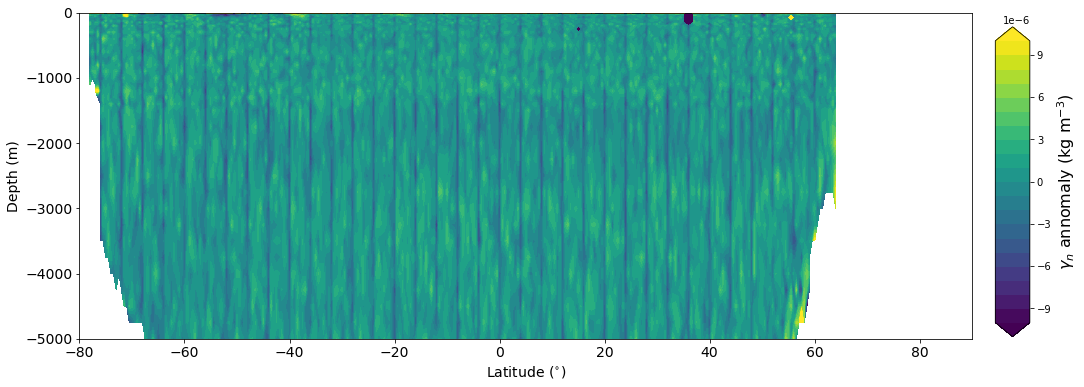

In [28]:
# plot difference between WOCE data set and my gamman calculated with pygamman
fig = plt.figure(figsize=(16,6.0))


ax1=plt.subplot(111)
#pdlevs=np.arange(1025,1029,0.1)
pdlevs=np.arange(-0.00001,0.00001,0.000001)
#pdlevs=np.array([25.,26.,27.,27.7,27.8,27.9,28.0,28.1,28.2,28.3])
npdlevs=pdlevs.shape[0]

#cp1=ax1.contourf(wlat,-1*wdepth,zwgamman,levs4,extend='both')
cp1=ax1.contourf(wlat,-1.0*wdepth,zgndiff,pdlevs,extend='both')
#cp2a=ax1.contour(wlat,-1.0*wdepth,zwgamman,[27.9],color='w')
#cp2b=ax1.contour(wlat,-1.0*wdepth,zgndiff,pdlevs,colors='k')
ax1.set_ylim(-5000,0)
ax1.set_ylabel("Depth (m)",size=14)
ax1.set_xlabel("Latitude ($^{\circ}$)",size=14)



#ax1.axes.get_xaxis().set_visible(False) # Turn of bottom axis
setaxesfsize(ax1,14)
pos = ax1.get_position()
l, b, w, h = pos.bounds
#print l,b,w,h
cbarxoffset=0.02
cbaryoffset=0.005
ctax1 = fig.add_axes([l+w+cbarxoffset, b+cbaryoffset, 0.03, h*0.95]) # setup colorbar axes
cb1=fig.colorbar(cp1, cax=ctax1, orientation='vertical') # draw colorbar
cb1arstrc="$\gamma_n$ annomaly (kg m$^{-3}$)"
cb1.set_label(cb1arstrc,fontsize=16,y=0.5)

plt.subplots_adjust(hspace=0.0)

# So we can see that WOCE used the same routine to get the dataset, but I don't know how they got data 
# > 64 N , they may have used another routine.